In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\ayoub\OneDrive\Documents\Python\Embouteillage\Trafic_A21.csv" , sep=";")
df2 = pd.read_csv(r"C:\Users\ayoub\OneDrive\Documents\Python\Embouteillage\2nd_files.csv" , sep=";")
df3 = pd.read_csv(r"C:\Users\ayoub\OneDrive\Documents\Python\Embouteillage\3rd_files.csv" , sep=";")

In [3]:
df.head()

,date,nom_point,latitude,longitude,vitesse_reelle,vitesse_habituelle,bouchon_seconds,niveau traffic
0,2025-12-07 15:27:16,Point A_1 - Inser1 vers D,50.431770,2.931005,112,112,0,0
1,2025-12-07 15:27:16,Point B_1 - Mid_Inser1-2 vers D,50.432193,2.937499,110,110,0,0
2,2025-12-07 15:27:16,Point C_1 _ Inser 2 vers D,50.430505,2.962100,108,108,0,0
3,2025-12-07 15:27:17,Point D_1 _ Sortie1 _ vers D,50.428886,2.979063,98,98,0,0
4,2025-12-07 15:27:17,Point E_1 _ Insertion- vers L,50.423737,3.022513,108,108,0,0


In [4]:
df.shape

(29788, 8)

In [5]:
nv = df.copy()
NV = pd.concat([nv,df2,df3])

#Ajout d'autre fichier csv

In [6]:
NV.shape

(30278, 8)

In [7]:
NV["date"] = pd.to_datetime(NV["date"])
NV.dtypes

date                  datetime64[ns]
nom_point                     object
latitude                     float64
longitude                    float64
vitesse_reelle                 int64
vitesse_habituelle             int64
bouchon_seconds                int64
niveau traffic                 int64
dtype: object

In [8]:
NV

,date,nom_point,latitude,longitude,vitesse_reelle,vitesse_habituelle,bouchon_seconds,niveau traffic
0,2025-12-07 15:27:16,Point A_1 - Inser1 vers D,50.431770,2.931005,112,112,0,0
1,2025-12-07 15:27:16,Point B_1 - Mid_Inser1-2 vers D,50.432193,2.937499,110,110,0,0
2,2025-12-07 15:27:16,Point C_1 _ Inser 2 vers D,50.430505,2.962100,108,108,0,0
3,2025-12-07 15:27:17,Point D_1 _ Sortie1 _ vers D,50.428886,2.979063,98,98,0,0
4,2025-12-07 15:27:17,Point E_1 _ Insertion- vers L,50.423737,3.022513,108,108,0,0
...,...,...,...,...,...,...,...,...
142,2025-12-08 07:05:19,Point C_1 _ Inser 2 vers D,50.430505,2.962100,77,107,21,0
143,2025-12-08 07:05:20,Point D_1 _ Sortie1 _ vers D,50.428886,2.979063,51,97,72,1
144,2025-12-08 07:05:20,Point E_1 _ Insertion- vers L,50.423737,3.022513,41,109,99,1
145,2025-12-08 07:05:21,Point F_1 _ Radar _ Douai,50.424005,3.020059,48,103,68,1


In [9]:
#Rangement par ordre chronologique de la colonne time
NV.sort_values("date" , ascending= True , inplace= True)
NV

,date,nom_point,latitude,longitude,vitesse_reelle,vitesse_habituelle,bouchon_seconds,niveau traffic
0,2025-12-07 15:27:16,Point A_1 - Inser1 vers D,50.431770,2.931005,112,112,0,0
1,2025-12-07 15:27:16,Point B_1 - Mid_Inser1-2 vers D,50.432193,2.937499,110,110,0,0
2,2025-12-07 15:27:16,Point C_1 _ Inser 2 vers D,50.430505,2.962100,108,108,0,0
3,2025-12-07 15:27:17,Point D_1 _ Sortie1 _ vers D,50.428886,2.979063,98,98,0,0
4,2025-12-07 15:27:17,Point E_1 _ Insertion- vers L,50.423737,3.022513,108,108,0,0
...,...,...,...,...,...,...,...,...
29783,2026-01-13 09:06:14,Point C_1 _ Inser 2 vers D,50.430505,2.962100,109,109,0,0
29784,2026-01-13 09:06:14,Point D_1 _ Sortie1 _ vers D,50.428886,2.979063,99,99,0,0
29786,2026-01-13 09:06:15,Point F_1 _ Radar _ Douai,50.424005,3.020059,105,105,0,0
29785,2026-01-13 09:06:15,Point E_1 _ Insertion- vers L,50.423737,3.022513,108,108,0,0


In [10]:
print(NV[NV["bouchon_seconds"] > 250])

                     date                              nom_point   latitude  \
134   2025-12-08 07:00:15        Point B_1 - Mid_Inser1-2 vers D  50.432193   
1367  2025-12-09 07:50:09   Point A_2 - Inser1 vers L  (Corrigé)  50.431770   
1375  2025-12-09 07:55:11   Point A_2 - Inser1 vers L  (Corrigé)  50.431770   
1383  2025-12-09 08:00:13   Point A_2 - Inser1 vers L  (Corrigé)  50.431770   
1391  2025-12-09 08:05:16   Point A_2 - Inser1 vers L  (Corrigé)  50.431770   
...                   ...                                    ...        ...   
27620 2026-01-10 18:37:25  Point A_1 - Vrai Point Inser1 vers D   50.431664   
27622 2026-01-10 18:37:26        Point B_1 - Mid_Inser1-2 vers D  50.432193   
29429 2026-01-12 17:35:53   Point A_2 - Inser1 vers L  (Corrigé)  50.431770   
29456 2026-01-12 17:51:02           Point D_1 _ Sortie1 _ vers D  50.428886   
29464 2026-01-12 17:56:05           Point D_1 _ Sortie1 _ vers D  50.428886   

       longitude  vitesse_reelle  vitesse_habituell

In [11]:
NV["nom_point"] = NV["nom_point"].replace("Point D_1 _ Sortie1 _ vers D" ,"Point E_1 BIS _ Insertion- vers L")
NV["nom_point"]
#Point qui n'était pas associé aux bonnes coordonées

0                 Point A_1 - Inser1 vers D
1           Point B_1 - Mid_Inser1-2 vers D
2                Point C_1 _ Inser 2 vers D
3         Point E_1 BIS _ Insertion- vers L
4             Point E_1 _ Insertion- vers L
                        ...                
29783            Point C_1 _ Inser 2 vers D
29784     Point E_1 BIS _ Insertion- vers L
29786             Point F_1 _ Radar _ Douai
29785         Point E_1 _ Insertion- vers L
29787    Point G_1 _ Sortie Final _  vers D
Name: nom_point, Length: 30278, dtype: object

In [12]:
NV

,date,nom_point,latitude,longitude,vitesse_reelle,vitesse_habituelle,bouchon_seconds,niveau traffic
0,2025-12-07 15:27:16,Point A_1 - Inser1 vers D,50.431770,2.931005,112,112,0,0
1,2025-12-07 15:27:16,Point B_1 - Mid_Inser1-2 vers D,50.432193,2.937499,110,110,0,0
2,2025-12-07 15:27:16,Point C_1 _ Inser 2 vers D,50.430505,2.962100,108,108,0,0
3,2025-12-07 15:27:17,Point E_1 BIS _ Insertion- vers L,50.428886,2.979063,98,98,0,0
4,2025-12-07 15:27:17,Point E_1 _ Insertion- vers L,50.423737,3.022513,108,108,0,0
...,...,...,...,...,...,...,...,...
29783,2026-01-13 09:06:14,Point C_1 _ Inser 2 vers D,50.430505,2.962100,109,109,0,0
29784,2026-01-13 09:06:14,Point E_1 BIS _ Insertion- vers L,50.428886,2.979063,99,99,0,0
29786,2026-01-13 09:06:15,Point F_1 _ Radar _ Douai,50.424005,3.020059,105,105,0,0
29785,2026-01-13 09:06:15,Point E_1 _ Insertion- vers L,50.423737,3.022513,108,108,0,0


In [13]:
NV["vitesse_precedente"] = NV.groupby("nom_point")["vitesse_reelle"].shift(1)  #vitesse d'il y a 5 min , d'une ligne avant
NV["vitesse_j-1"] = NV.groupby("nom_point")["vitesse_reelle"].shift(288)     #288 = 24*12   12 = 60/5 (on a des données ttes les 5 min) donc on se décale de 288 lignes
NV["vitesse_week-1"] = NV.groupby("nom_point")["vitesse_reelle"].shift(2016)


NV["vitesse_precedente"] = NV["vitesse_precedente"].fillna(NV["vitesse_precedente"])
NV["vitesse_j-1"] = NV["vitesse_j-1"].fillna(NV["vitesse_j-1"])
NV["vitesse_week-1"] = NV["vitesse_week-1"].fillna(NV["vitesse_week-1"])

In [14]:
df_ref = NV[['date', 'nom_point', 'vitesse_reelle']].copy()
df_ref['date_cle'] = df_ref['date'] + pd.Timedelta(minutes=5)
NV = NV.merge(df_ref[['date_cle', 'nom_point', 'vitesse_reelle']], left_on=['date', 'nom_point'], right_on=['date_cle', 'nom_point'], how='left', suffixes=('', '_5Min_ago'))
NV.drop(columns=['date_cle'], inplace=True)

In [15]:
encoder = OneHotEncoder(sparse_output=False)
column_to_code = encoder.fit_transform(NV[["nom_point"]])
df_nom = pd.DataFrame(column_to_code , columns=encoder.get_feature_names_out(["nom_point"]))

In [16]:
#On encode les variables d'entrée
NV = NV.reset_index(drop= True)
NV.index = df_nom.index
NV = pd.concat([NV.drop("nom_point", axis=1) , df_nom] , axis=1)


In [17]:
NV

,date,latitude,longitude,vitesse_reelle,vitesse_habituelle,bouchon_seconds,niveau traffic,vitesse_precedente,vitesse_j-1,vitesse_week-1,vitesse_reelle_5Min_ago,nom_point_Point A_1 - Inser1 vers D,nom_point_Point A_1 - Vrai Point Inser1 vers D,nom_point_Point A_2 - Inser1 vers L (Corrigé),nom_point_Point B_1 - Mid_Inser1-2 vers D,nom_point_Point C_1 _ Inser 2 vers D,nom_point_Point E_1 BIS _ Insertion- vers L,nom_point_Point E_1 _ Insertion- vers L,nom_point_Point F_1 _ Radar _ Douai,nom_point_Point G_1 _ Sortie Final _ vers D
0,2025-12-07 15:27:16,50.431770,2.931005,112,112,0,0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-12-07 15:27:16,50.432193,2.937499,110,110,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2025-12-07 15:27:16,50.430505,2.962100,108,108,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2025-12-07 15:27:17,50.428886,2.979063,98,98,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2025-12-07 15:27:17,50.423737,3.022513,108,108,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30273,2026-01-13 09:06:14,50.430505,2.962100,109,109,0,0,109.0,109.0,109.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30274,2026-01-13 09:06:14,50.428886,2.979063,99,99,0,0,99.0,98.0,98.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30275,2026-01-13 09:06:15,50.424005,3.020059,105,105,0,0,105.0,105.0,105.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30276,2026-01-13 09:06:15,50.423737,3.022513,108,108,0,0,108.0,108.0,108.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
#Ajouter d'autres périodes de vacances si jamais
def vacances(date):
    d = pd.Timestamp(date)
    if pd.Timestamp("2025-12-20") <= d <= pd.Timestamp("2026-01-05"):
        return 0
    return 1

In [19]:
#On ajoute des infos directement depuis la colonne date

NV["Shift"] = np.where(NV["date"].dt.hour >= 13 , "Après_midi" , "Matin")
NV["Shift_code"] = (NV["date"].dt.hour >= 13).astype(int)
NV["Week"] = np.where(NV["date"].dt.dayofweek >= 5 , 'Week-End' , "Semaine")
NV["Week_code"] = (NV["date"].dt.dayofweek >= 5).astype(int)
NV["Holiday_code"] = NV["date"].apply(vacances)   #1 période scolaire 0 = vacances


In [20]:
NV

,date,latitude,longitude,vitesse_reelle,vitesse_habituelle,bouchon_seconds,niveau traffic,vitesse_precedente,vitesse_j-1,vitesse_week-1,...,nom_point_Point C_1 _ Inser 2 vers D,nom_point_Point E_1 BIS _ Insertion- vers L,nom_point_Point E_1 _ Insertion- vers L,nom_point_Point F_1 _ Radar _ Douai,nom_point_Point G_1 _ Sortie Final _ vers D,Shift,Shift_code,Week,Week_code,Holiday_code
0,2025-12-07 15:27:16,50.431770,2.931005,112,112,0,0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,Après_midi,1,Week-End,1,1
1,2025-12-07 15:27:16,50.432193,2.937499,110,110,0,0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,Après_midi,1,Week-End,1,1
2,2025-12-07 15:27:16,50.430505,2.962100,108,108,0,0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,Après_midi,1,Week-End,1,1
3,2025-12-07 15:27:17,50.428886,2.979063,98,98,0,0,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,Après_midi,1,Week-End,1,1
4,2025-12-07 15:27:17,50.423737,3.022513,108,108,0,0,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,Après_midi,1,Week-End,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30273,2026-01-13 09:06:14,50.430505,2.962100,109,109,0,0,109.0,109.0,109.0,...,1.0,0.0,0.0,0.0,0.0,Matin,0,Semaine,0,1
30274,2026-01-13 09:06:14,50.428886,2.979063,99,99,0,0,99.0,98.0,98.0,...,0.0,1.0,0.0,0.0,0.0,Matin,0,Semaine,0,1
30275,2026-01-13 09:06:15,50.424005,3.020059,105,105,0,0,105.0,105.0,105.0,...,0.0,0.0,0.0,1.0,0.0,Matin,0,Semaine,0,1
30276,2026-01-13 09:06:15,50.423737,3.022513,108,108,0,0,108.0,108.0,108.0,...,0.0,0.0,1.0,0.0,0.0,Matin,0,Semaine,0,1


In [21]:
target = "vitesse_reelle"
colonne = ["vitesse_reelle", "date", "vitesse_habituelle",'bouchon_seconds', "niveau traffic" , 'Shift' , "Week" ,"vitesse_reelle_5Min_ago"] #on enlève les colonnes qui ne contiennent pas des int ou float
#rajouter vitesse_precedente si le modèle est trop lazy 

In [22]:
train = NV[NV["date"] < "2025-12-17 06:00:00" ]
test = NV[NV["date"] >= "2025-12-17 06:00:00" ]
data = NV[colonne]

In [23]:
X =data.drop(columns=[target, "date"])

X_Train = train.drop(columns= colonne )
Y_train = train[target]

X_test = test.drop(columns= colonne)
Y_test = test[target]

In [24]:
#Début du modèle

In [25]:
regressor = RandomForestRegressor(n_estimators= 100 , random_state=42, n_jobs= 1) 

In [26]:
regressor.fit(X_Train,Y_train)

RandomForestRegressor(n_jobs=1, random_state=42)

In [27]:
Y_Pred = regressor.predict(X_test)

Erreur moyenne: 1.6 km/h


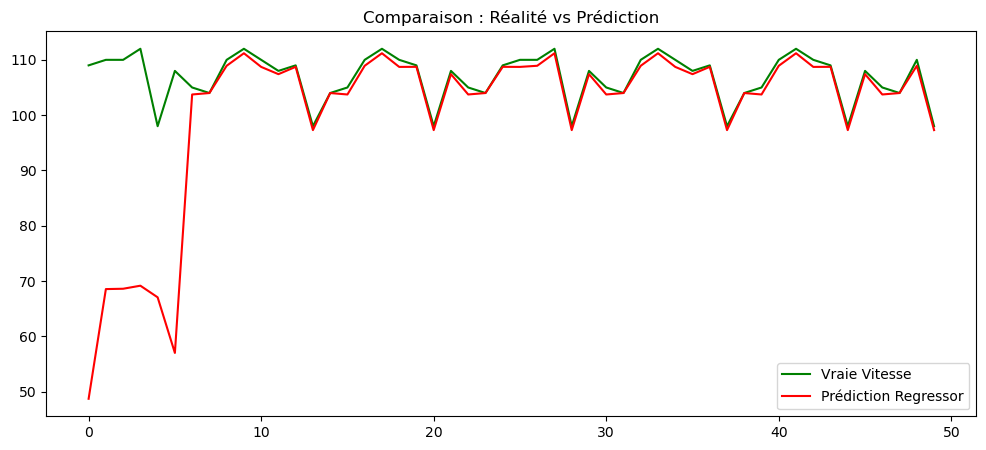

In [28]:
erreur = abs(Y_test - Y_Pred).mean()  #mean = la moyenne de chaque distance  
print(f"Erreur moyenne: {erreur:.1f} km/h")

#Graphique matplotlib
plt.figure(figsize=(12, 5))
plt.plot(Y_test.values[:50], label="Vraie Vitesse", color="green")
plt.plot(Y_Pred[:50], label="Prédiction Regressor", color="red")
plt.legend()
plt.title("Comparaison : Réalité vs Prédiction")
plt.show()    #graphique comprenant les 2 voies 

In [29]:
print(f"Moyenne vitesse Entraînement : {Y_train.mean():.2f}")
print(f"Moyenne vitesse Test (Futur) : {Y_test.mean():.2f}")

Moyenne vitesse Entraînement : 99.28
Moyenne vitesse Test (Futur) : 104.37


In [30]:
importances = regressor.feature_importances_
noms_colonnes = X_Train.columns

df_imp = pd.DataFrame({"Variable": noms_colonnes, "Importance": importances})
df_imp = df_imp.sort_values("Importance", ascending=False) 

print(df_imp)

                                           Variable  Importance
2                                vitesse_precedente    0.949172
3                                       vitesse_j-1    0.020472
14                                       Shift_code    0.006114
1                                         longitude    0.005492
0                                          latitude    0.004827
15                                        Week_code    0.002910
9              nom_point_Point C_1 _ Inser 2 vers D    0.002158
5               nom_point_Point A_1 - Inser1 vers D    0.001581
10      nom_point_Point E_1 BIS _ Insertion- vers L    0.001525
11          nom_point_Point E_1 _ Insertion- vers L    0.001459
6   nom_point_Point A_1 - Vrai Point Inser1 vers D     0.001213
7    nom_point_Point A_2 - Inser1 vers L  (Corrigé)    0.001022
12              nom_point_Point F_1 _ Radar _ Douai    0.001006
8         nom_point_Point B_1 - Mid_Inser1-2 vers D    0.000841
13     nom_point_Point G_1 _ Sortie Fina

In [31]:
import joblib
joblib.dump(regressor , "regressor.pkl")
regressor_columns = X_Train.columns.tolist()
joblib.dump(regressor_columns , "regressor_colonne.pkl")

['regressor_colonne.pkl']